In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
import sys
sys.path.append('../src')

from utils.ClaseAbdon import DataFrameAnalyzer

In [3]:
df = pd.read_csv(r'..\data\raw\realtor-data.csv')

In [4]:
df.shape

(2226382, 12)

In [5]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [6]:
df.tail()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24
2226381,108243.0,sold,580000.0,5.0,3.0,0.31,307704.0,Richland,Washington,99354.0,3615.0,2022-03-23


In [7]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [8]:
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [9]:
df[df.duplicated()]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date


In [10]:
df_ob = df.select_dtypes('object')
for col in df_ob.columns:
    print(f'==========={col}===========')
    print(f'Numero de unicos: {df[col].nunique()}')
    print(f'Valores Unicos: {df[col].unique()}')
    print('\n')

===========status===========
Numero de unicos: 3
Valores Unicos: ['for_sale' 'ready_to_build' 'sold']


===========city===========
Numero de unicos: 20098
Valores Unicos: ['Adjuntas' 'Juana Diaz' 'Ponce' ... 'Tbd King Ave Pasco' 'Washtucna'
 'Kahlotus']


===========state===========
Numero de unicos: 55
Valores Unicos: ['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut'
 'New Hampshire' 'Vermont' 'New Jersey' 'New York' 'South Carolina'
 'Tennessee' 'Rhode Island' 'Virginia' 'Wyoming' 'Maine' 'Georgia'
 'Pennsylvania' 'West Virginia' 'Delaware' 'Louisiana' 'Ohio' 'California'
 'Colorado' 'Maryland' 'Missouri' 'District of Columbia' 'Wisconsin'
 'North Carolina' 'Kentucky' 'Michigan' 'Mississippi' 'Florida' 'Alabama'
 'New Brunswick' nan 'Texas' 'Arkansas' 'Idaho' 'Indiana' 'Illinois'
 'New Mexico' 'Iowa' 'Minnesota' 'South Dakota' 'Nebraska' 'North Dakota'
 'Montana' 'Oklahoma' 'Kansas' 'Oregon' 'Utah' 'Nevada' 'Washington'
 'Arizona' 'Hawaii' 'Guam' 'Alaska']


===========pr

### Primer contacto con los datos, vemos las dimensiones, valores unicos, duplicados, valores nulos.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [12]:
df['prev_sold_date'] = df['prev_sold_date'].str.replace('3019','2019')
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])

### Convertimos a DateTime la columna 'prev_sold_date' para poder manejarla mejor mas adelante.

In [13]:
analyzer = DataFrameAnalyzer(df)
# Instaciamos clase.

In [14]:
analyzer.resumen()

,Columna,Tipo de Dato,Cardinalidad,% Cardinalidad,Valores Faltantes,% Valores Faltantes,Categoría
0,brokered_by,float64,110143,4.95,4533,0.20,Numérica Continua
1,status,object,3,0.00,0,0.00,Categórica Nominal
2,price,float64,102137,4.59,1541,0.07,Numérica Continua
3,bed,float64,99,0.00,481317,21.62,Numérica Continua
4,bath,float64,86,0.00,511771,22.99,Numérica Continua
5,acre_lot,float64,16057,0.72,325589,14.62,Numérica Continua
6,street,float64,2001358,89.89,10866,0.49,Numérica Continua
7,city,object,20098,0.90,1407,0.06,Categórica Nominal
8,state,object,55,0.00,8,0.00,Categórica Nominal
9,zip_code,float64,30334,1.36,299,0.01,Numérica Continua


### Vemos que el tipo de dato de cada columna es coherente, vemos que street tiene una alta cardinalidad, y otras muy bajas (todo entra en lo normal por el momento). Hay una alta cantidad de valores nulos en varias columnas como house_Size, prev_sold_date, bath, bed. MAs adelante eliminaremos o imputaremos segun lo que vayamos analizando.

In [15]:
analyzer.describe_numeric()

,count,mean,median,mode,std_dev,min,25%,50%,75%,max,skewness,kurtosis
brokered_by,2221849.0,5.293989e+04,52884.00,22611.00,3.064275e+04,0.0,23861.00,52884.00,79183.00,1.101420e+05,0.147393,-1.124438e+00
price,2224841.0,5.241955e+05,325000.00,350000.00,2.138893e+06,0.0,165000.00,325000.00,550000.00,2.147484e+09,546.303063,4.924232e+05
bed,1745065.0,3.275841e+00,3.00,3.00,1.567274e+00,1.0,3.00,3.00,4.00,4.730000e+02,56.654813,1.297152e+04
bath,1714611.0,2.496440e+00,2.00,2.00,1.652573e+00,1.0,2.00,2.00,3.00,8.300000e+02,152.414997,6.587415e+04
acre_lot,1900793.0,1.522303e+01,0.26,0.17,7.628238e+02,0.0,0.15,0.26,0.98,1.000000e+05,106.280285,1.254232e+04
street,2215516.0,1.012325e+06,1012765.50,1916862.00,5.837635e+05,0.0,506312.75,1012765.50,1521173.25,2.001357e+06,-0.009230,-1.213007e+00
zip_code,2226083.0,5.218668e+04,48382.00,33993.00,2.895408e+04,0.0,29617.00,48382.00,78070.00,9.999900e+04,0.092234,-1.313181e+00
house_size,1657898.0,2.714471e+03,1760.00,1200.00,8.081635e+05,4.0,1300.00,1760.00,2413.00,1.040400e+09,1286.900100,1.656700e+06


### Con respecto a price, vemos que entre el min y max hay mucha diferencia por lo que los datos estan sesgados. Lo mismo con bed y bath.

In [16]:
analyzer.describe_categorical()

,unique_values,most_frequent,frequency,proportion
status,3,for_sale,1389306,62.40
city,20098,Houston,23862,1.07
state,55,Florida,249432,11.20


### el 63% de las casas estan en venta, y la ciudad mas frecuente es Houston con 1% de los datos. El estado mas frecuente es florida con un 11%.

In [17]:
df2 = df[(df['price'] > 0) & (df['house_size'] > 0)]

# Vamos a filtrar por las casas con un precio mayor a 0 y tamaño mayor a 0. 
# damos por hecho que son errores a la hora de extraer los datos, debido a que una casa de coste 0 o con tamaño 0 no existe

In [18]:
missing = df2.isnull().sum()
missing_pct = (missing / df2.shape[0]) * 100
round(missing_pct,2)

brokered_by        0.16
status             0.00
price              0.00
bed                1.23
bath               2.64
acre_lot          16.62
street             0.40
city               0.02
state              0.00
zip_code           0.01
house_size         0.00
prev_sold_date    23.42
dtype: float64

In [19]:
df2 = df2.dropna(subset=['street','city','state','zip_code'])
# Eliminamos los pocos missing que hay en estas columnas.

In [20]:
bins = [0, 500, 1000, 1500, 2000, 3000, 5000, 10000, np.inf]
labels = [1,2,3,4,5,6,7,8]

df2['size_bin'] = pd.cut(df2['house_size'], bins=bins, labels=labels)
# creamos bins y labels para poder manejar de el tamaño de las casas (muy sesgadas)
# XS = 1
# S = 2
# M = 3
# ML = 4
# L = 5
# XL = 6
# XXL = 7
# Mansion = 8

In [21]:
df2['bed'] = df2.groupby('size_bin')['bed'].transform(lambda x: x.fillna(x.median()))
# Imputamos bed segun la categoria del tamaño.

df2['bath'] = df2.groupby('bed')['bath'].transform(lambda x: x.fillna(x.median()))
df2['bath'].fillna(df2['bath'].median(),inplace=True)
# Imputamos con la media segun Bed, y bed segun el tamaño de la casa.

In [22]:
df2.isnull().sum()

brokered_by         2661
status                 0
price                  0
bed                    0
bath                   0
acre_lot          272748
street                 0
city                   0
state                  0
zip_code               0
house_size             0
prev_sold_date    385148
size_bin               0
dtype: int64

In [23]:
df2.drop(columns=['brokered_by','acre_lot'],inplace=True)
# Estas 2 columnas las eliminamos directamente, no la usaremos para el analisis.

In [32]:
df_house = df2[df2['size_bin'] != 8]
df_mansion = df2[df2['size_bin'] == 8]

In [33]:
analyzer_house = DataFrameAnalyzer(df_house)
analyzer_mansion = DataFrameAnalyzer(df_mansion)

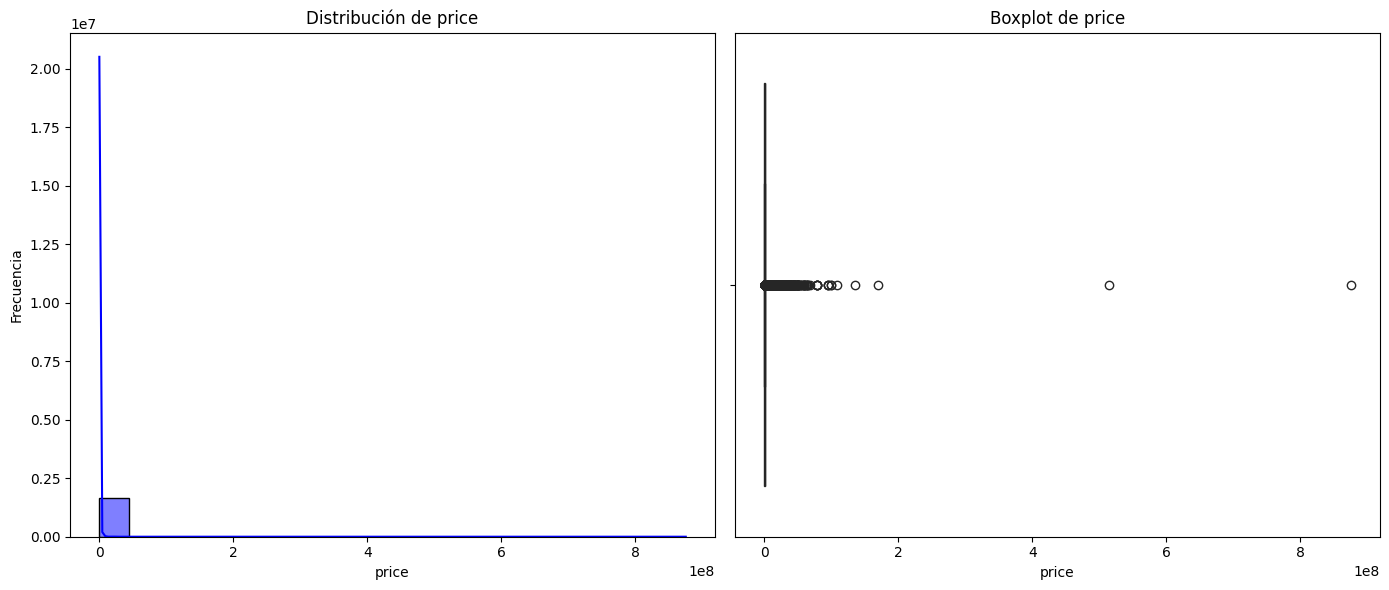

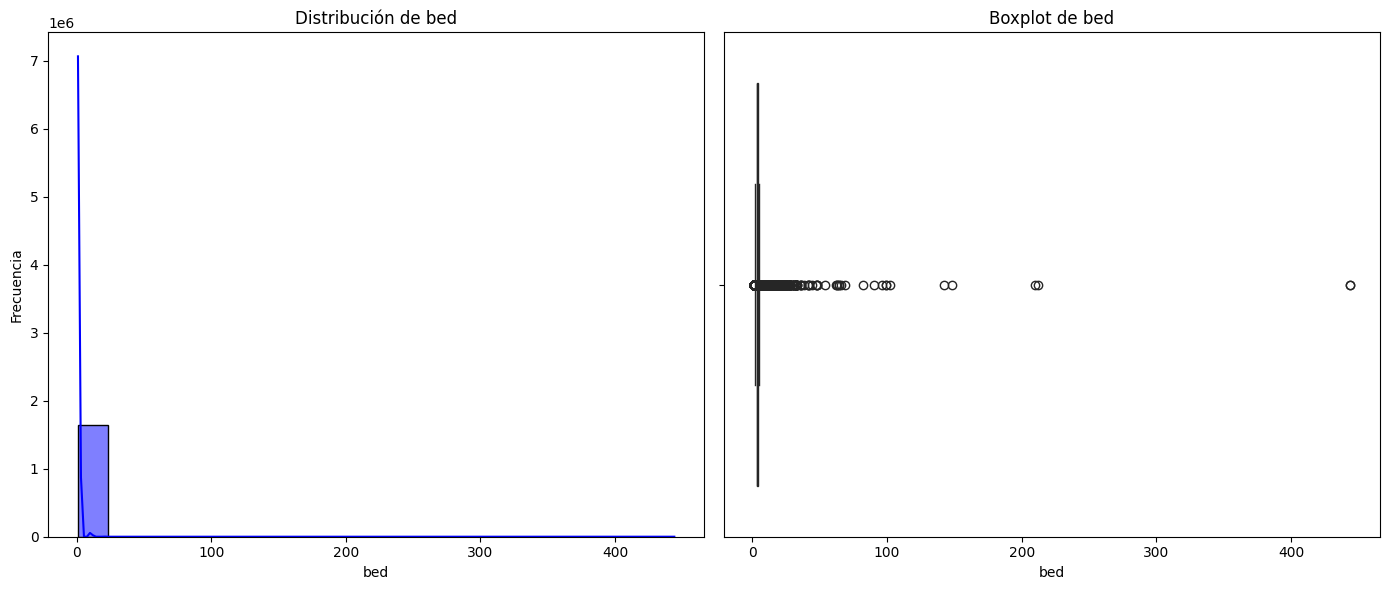

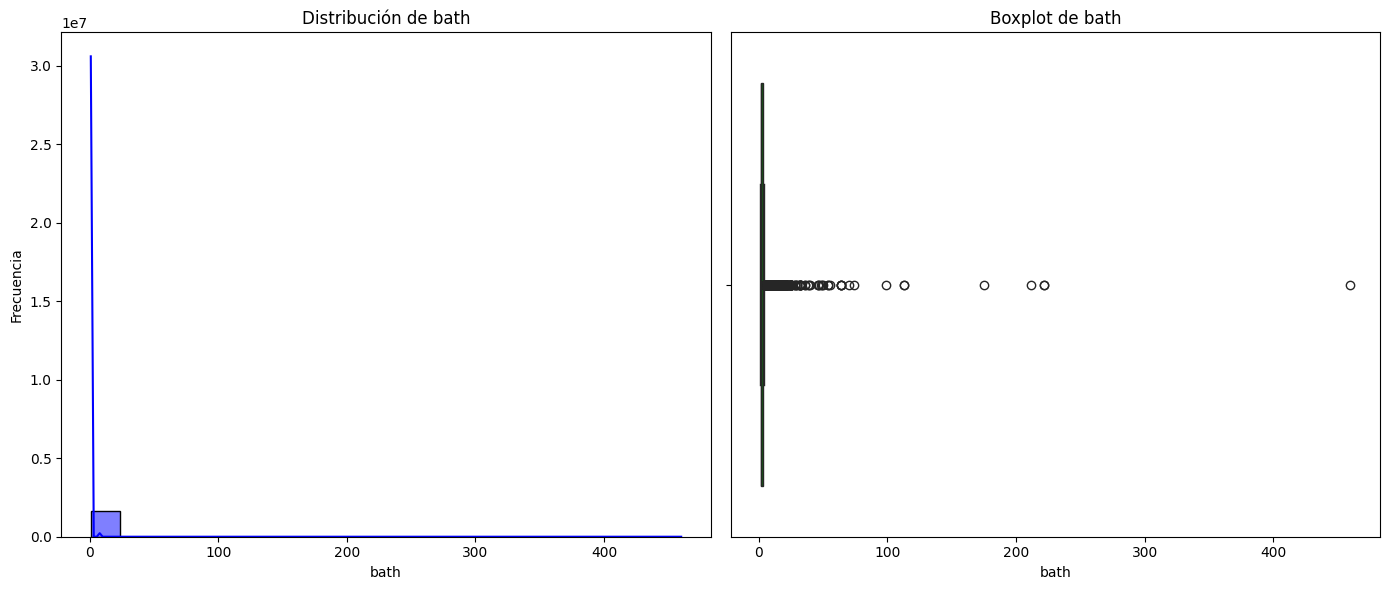

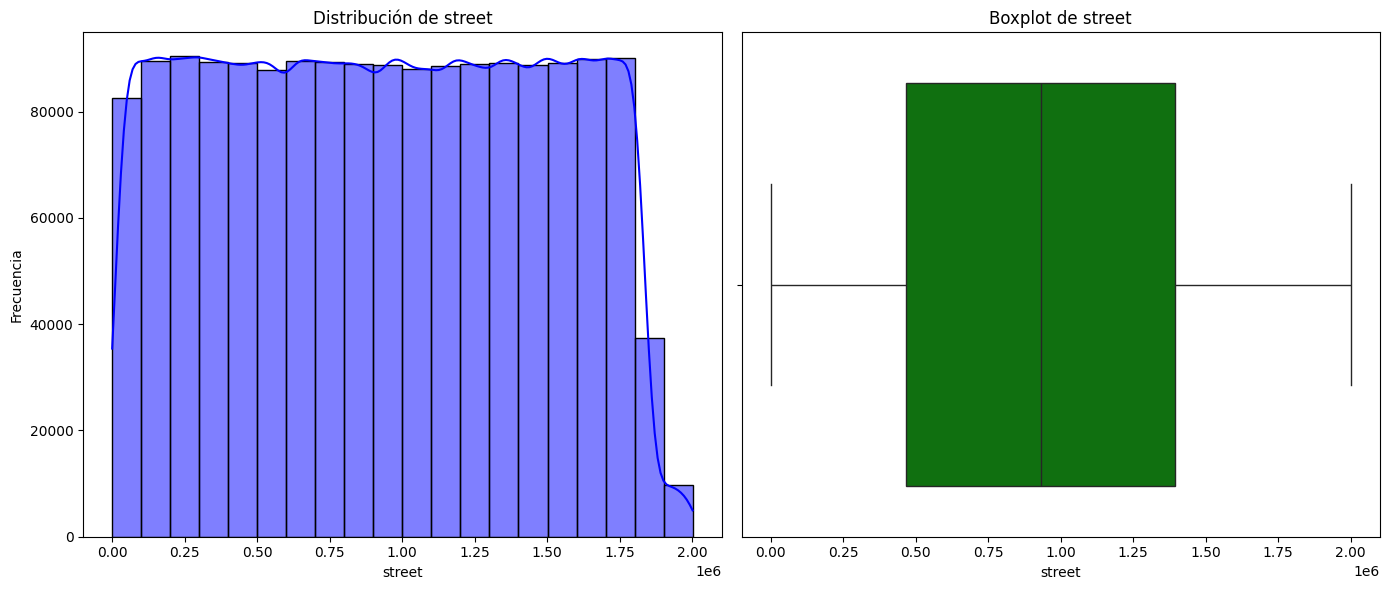

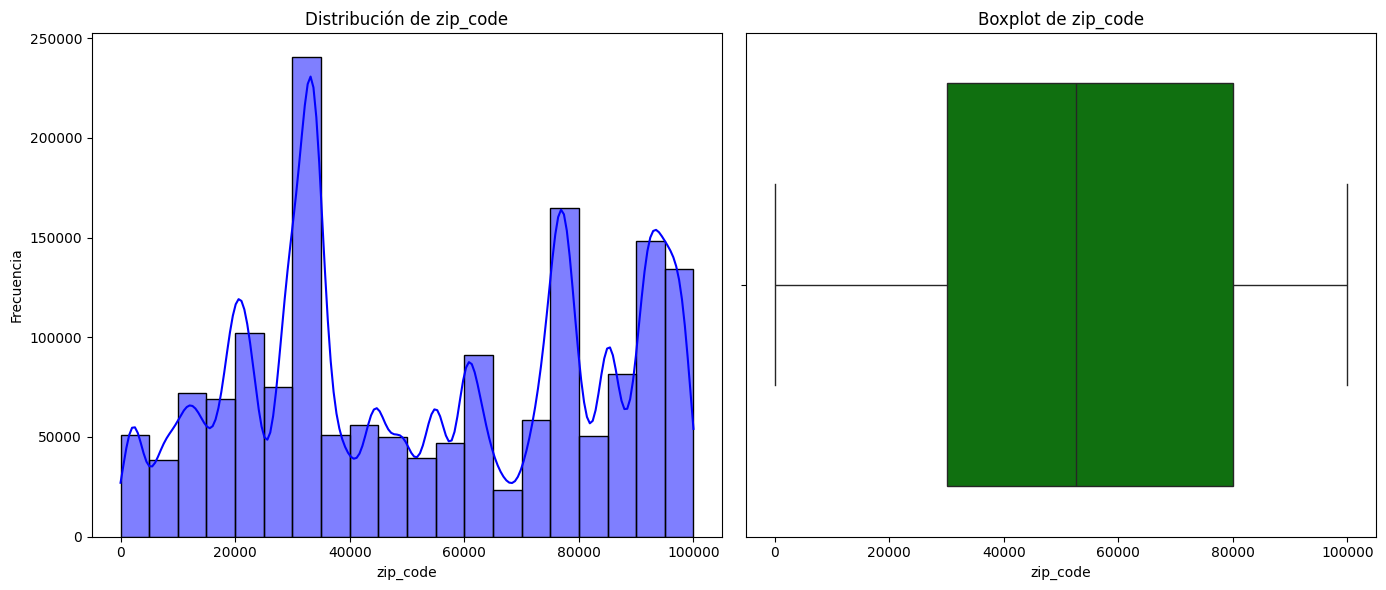

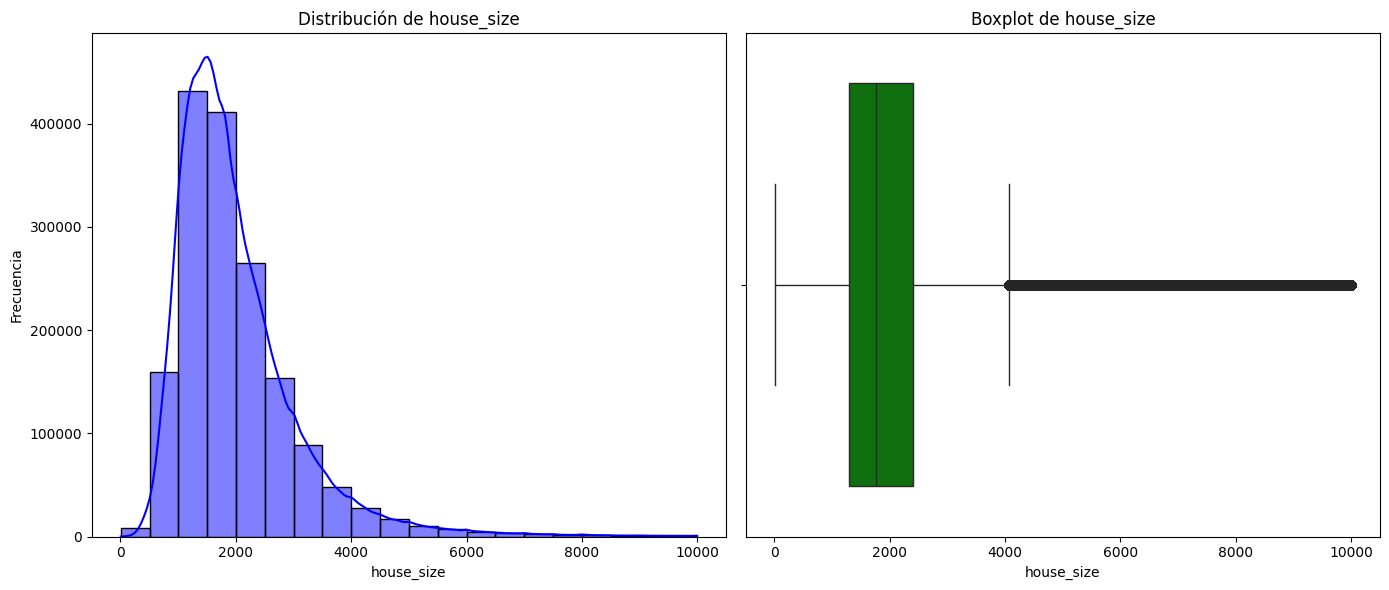

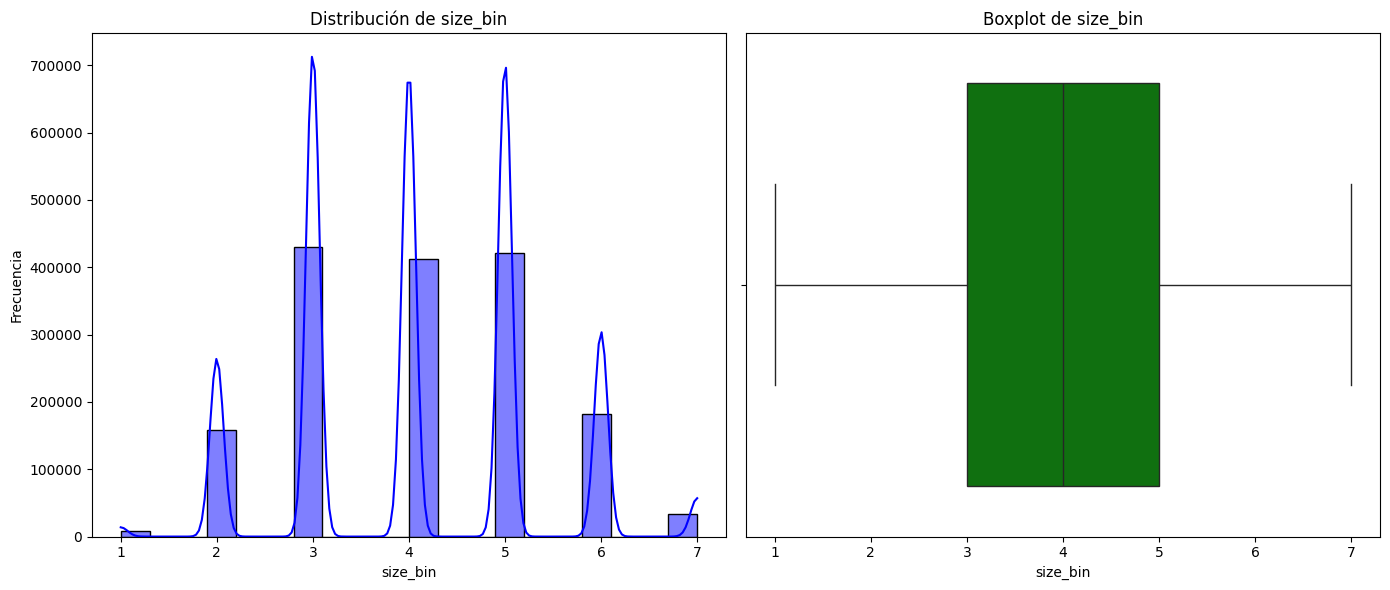

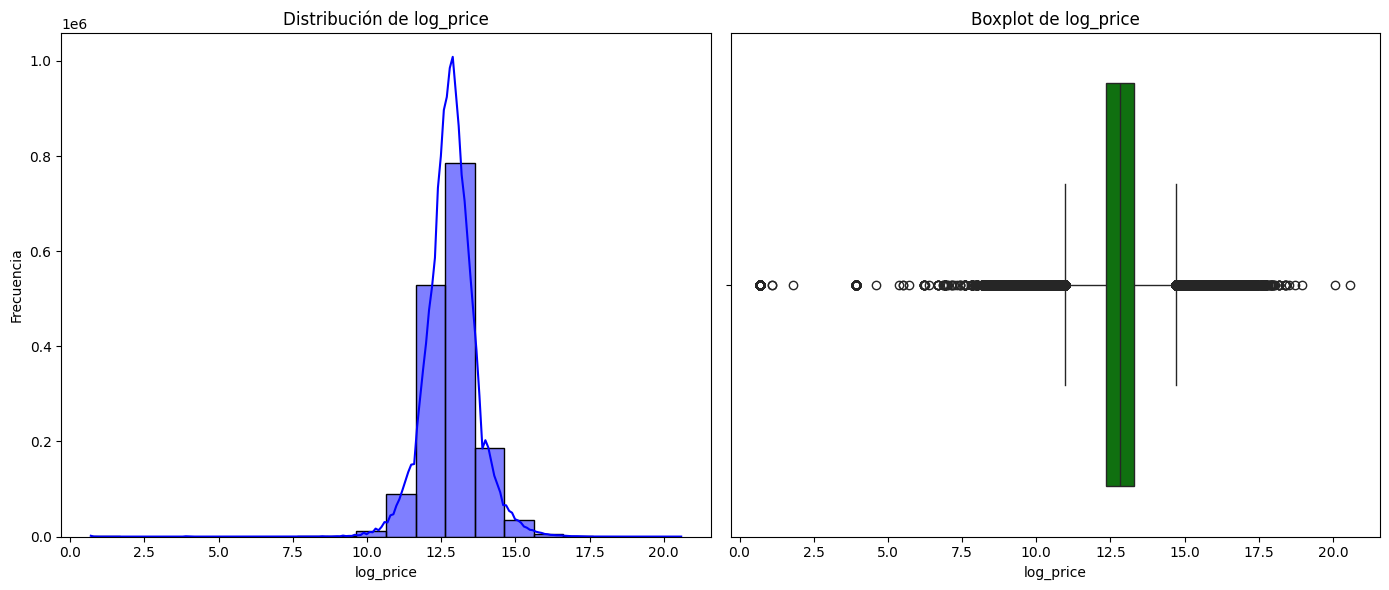

In [34]:
analyzer_house.plot_numeric()

<Axes: title={'center': 'Corr Houses'}>

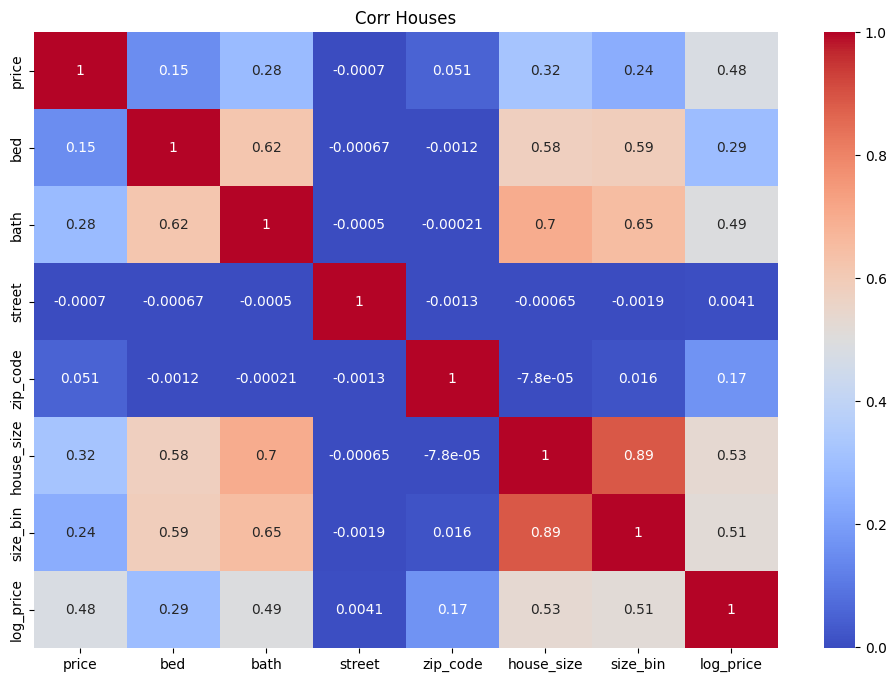

In [ ]:
df_house['size_bin'] = df_house['size_bin'].astype('int')
df_corr = df_house.corr(numeric_only=True)
plt.figure(figsize=(12,8))
plt.title('Corr Houses')
sns.heatmap(df_corr,annot=True, cmap='coolwarm');

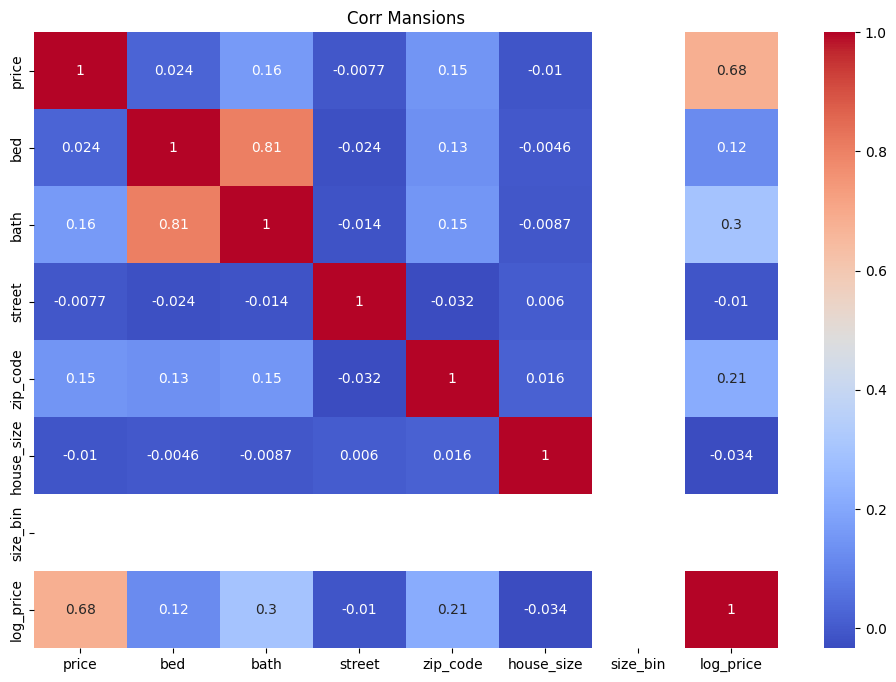

In [36]:
df_mansion['size_bin'] = df_mansion['size_bin'].astype('int')
df_corr = df_mansion.corr(numeric_only=True)
plt.figure(figsize=(12,8))
plt.title('Corr Mansions')
sns.heatmap(df_corr,annot=True, cmap='coolwarm');

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649596 entries, 0 to 2226381
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   status          1649596 non-null  object        
 1   price           1649596 non-null  float64       
 2   bed             1649596 non-null  float64       
 3   bath            1649596 non-null  float64       
 4   street          1649596 non-null  float64       
 5   city            1649596 non-null  object        
 6   state           1649596 non-null  object        
 7   zip_code        1649596 non-null  float64       
 8   house_size      1649596 non-null  float64       
 9   prev_sold_date  1264448 non-null  datetime64[ns]
 10  size_bin        1649596 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 151.0+ MB


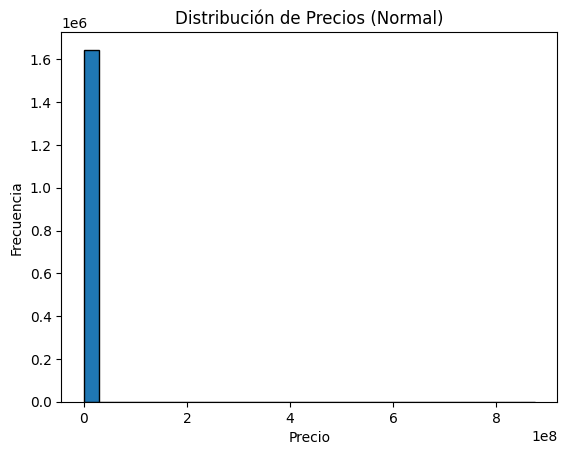

In [37]:
plt.hist(df_house['price'], bins=30, edgecolor='black')
plt.title('Distribución de Precios (Normal)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

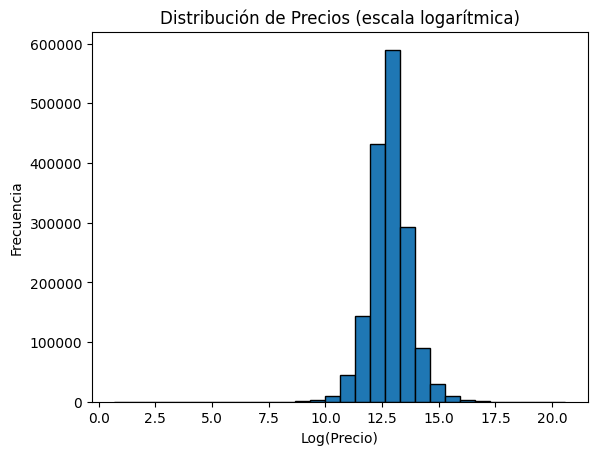

In [38]:
df2['log_price'] = np.log1p(df2['price'])

plt.hist(df2['log_price'], bins=30, edgecolor='black')
plt.title('Distribución de Precios (escala logarítmica)')
plt.xlabel('Log(Precio)')
plt.ylabel('Frecuencia')
plt.show()

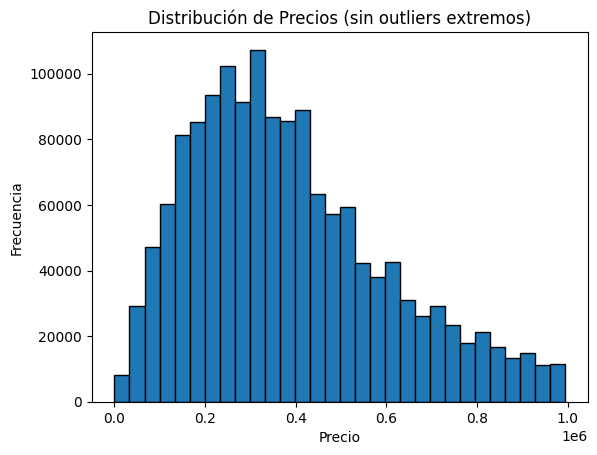

In [39]:
precio_limite = df2['price'].quantile(0.90)
df2_filtrado = df2[df2['price'] <= precio_limite]

plt.hist(df2_filtrado['price'], bins=30, edgecolor='black')
plt.title('Distribución de Precios (sin outliers extremos)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()
